In [ ]:
!pip install gdal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install osgeo==<different-version>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `pip install osgeo==<different-version>'


In [2]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ds = gdal.Open("/LC08_L2SP_151035_20200316_20200822_02_T1_SR_B1.TIF")
if not ds:
  print("Image loading failed!")
ds2 = gdal.Open("/LC08_L2SP_151035_20200316_20200822_02_T1_SR_B2.TIF")
if not ds:
  print("Image loading failed!")
ds3 = gdal.Open("/LC08_L2SP_151035_20200316_20200822_02_T1_SR_B3.TIF")
if not ds:
  print("Image loading failed!")
ds4 = gdal.Open("/LC08_L2SP_151035_20200316_20200822_02_T1_SR_B5.TIF")
if not ds:
  print("Image loading failed!")
ds5 = gdal.Open("/LC08_L2SP_151035_20200316_20200822_02_T1_SR_B4.TIF")
if not ds:
  print("Image loading failed!")
ds6 = gdal.Open("/LC08_L2SP_151035_20200316_20200822_02_T1_SR_B6.TIF")
if not ds:
  print("Image loading failed!")
ds7 = gdal.Open("/LC08_L2SP_151035_20200316_20200822_02_T1_SR_B7.TIF")
if not ds:
  print("Image loading failed!")

In [5]:
B1 = ds.GetRasterBand(1).ReadAsArray()
B2 = ds2.GetRasterBand(1).ReadAsArray()
B3 = ds3.GetRasterBand(1).ReadAsArray()
B4 = ds4.GetRasterBand(1).ReadAsArray()
B5 = ds5.GetRasterBand(1).ReadAsArray()
B6 = ds6.GetRasterBand(1).ReadAsArray()

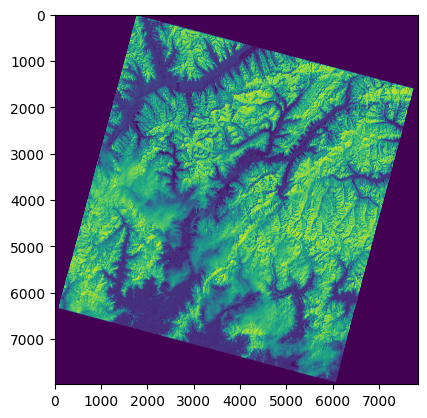

In [9]:
plt.figure()
plt.imshow(B1)
plt.show()

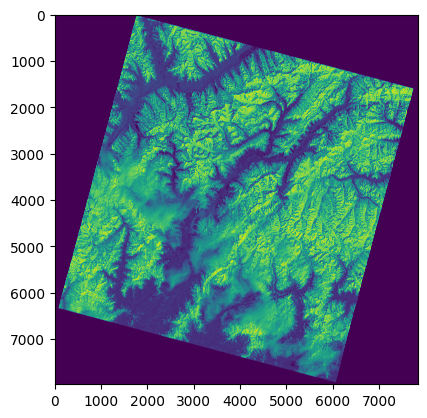

In [10]:
B2 = ds2.GetRasterBand(1).ReadAsArray()
plt.figure()
plt.imshow(B2)
plt.show()

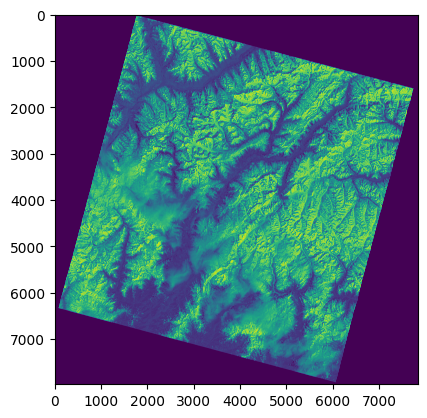

In [11]:
B3 = ds3.GetRasterBand(1).ReadAsArray()
plt.figure()
plt.imshow(B3)
plt.show()

In [13]:
print(B1.shape)

(7981, 7841)


In [6]:
def scaleMinMax(x):
  return((x - np.nanmin(x))/(np.nanmax(x) - np.nanmin(x)))
def scaleCCC(x):
  return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))
def scaleStd(x):
  return((x - (np.nanmean(x)-np.nanstd(x)*2))/((np.nanmean(x)+np.nanstd(x)*2) - (np.nanmean(x)-np.nanstd(x)*2)))

In [7]:
B1MinMax = scaleMinMax(B1)
B2MinMax = scaleMinMax(B2)
B3MinMax = scaleMinMax(B3)
B4MinMax = scaleMinMax(B4)
B5MinMax = scaleMinMax(B5)
B6MinMax = scaleMinMax(B6)
#just to check the output of Band 1 minmax matrix
print(B1MinMax)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


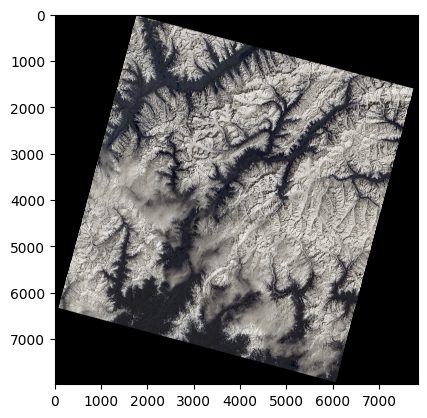

In [16]:
rgbMinMax = np.dstack((B1MinMax,B2MinMax,B3MinMax))
plt.figure()
plt.imshow(rgbMinMax)
plt.show()

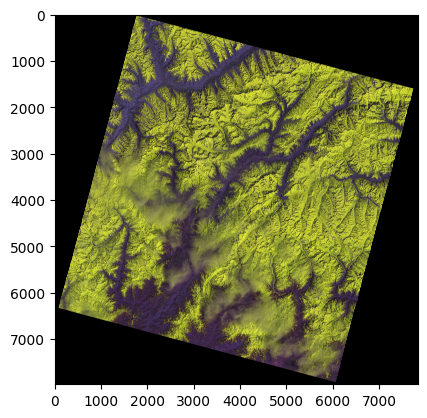

In [8]:
b4b5b6MinMax = np.dstack((B4MinMax,B5MinMax,B6MinMax))
plt.figure()
plt.imshow(b4b5b6MinMax )
plt.show()

In [11]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from PIL import Image

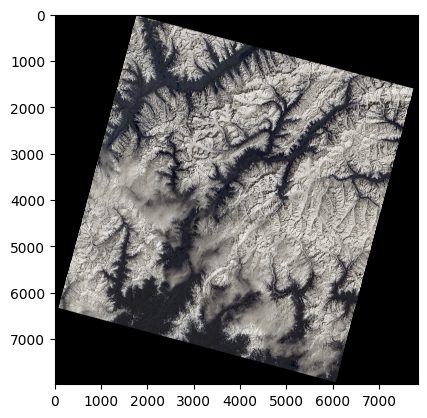

In [16]:
filename = 'b1b2b3.png'
filename1 = 'b4b5b6.png'
frontImage = Image.open(filename)

background = Image.open(filename1)

frontImage = frontImage.convert("RGBA")
background = background.convert("RGBA")

width = (background.width - frontImage.width) // 2

height = (background.height - frontImage.height) // 2
background.paste(frontImage, (width, height), frontImage)
background.save("new.png", format="png")
new_image = Image.open('new.png')
new_image.show()